# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

As per [the article describing the business case](http://localhost:8888/notebooks/module17/module_17_starter/CRISP-DM-BANK.pdf):
> The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts. D

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Observing dataframe info shows that there are no missing values from the dataset.

There are 11 features classified as object that would need to be encoded if they are to be included as part of the model training. Of these, one of them, "y" (our target variable) doesn't necessarily need to be encoded depending on the type of model used. Still, it would be better to encode it to a 0/1 value to avoid any unexpected behavior.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Based on the [included article](http://localhost:8888/notebooks/module17/module_17_starter/CRISP-DM-BANK.pdf), the business objective of this task is to build a model to explain the success of a contact as part of a direct marketing campaign, and then, as per the abstract of the article:
> use that model to determine the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [13]:
list_str_obj_cols = df.select_dtypes(include=['object'])

for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [14]:
bank_df = df.iloc[:, :7]
bank_df.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [18]:
transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include='category')),
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_bank = bank_df
y_bank = np.where(df['y'] == 'yes', 1, 0)

In [24]:
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, stratify=y_bank)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

In [31]:
base_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DummyClassifier(random_state=42))
])

base_pipeline.fit(X_bank_train, y_bank_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11e456a90>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11eb3f810>)])),
                ('clf', DummyClassifier(random_state=42))])

In [32]:
base_pipeline.score(X_bank_train, y_bank_train)

0.8873444613050075

In [33]:
base_pipeline.score(X_bank_test, y_bank_test)

0.8873512988589464

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
import time
from sklearn.linear_model import LogisticRegression

In [44]:
lr_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

lr_fit_start = time.time()
lr_pipeline.fit(X_bank_train, y_bank_train)
lr_fit_end = time.time()

lr_fit_time = (lr_fit_end - lr_fit_start)

### Problem 9: Score the Model

What is the accuracy of your model?

In [37]:
lr_pipeline.score(X_bank_train, y_bank_train)

0.8873444613050075

In [38]:
lr_pipeline.score(X_bank_test, y_bank_test)

0.8873512988589464

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
models = ['LR', 'KNN', 'DT', 'SVM']
train_times = []
train_accuracy = []
test_accuracy = []

In [48]:
# Logistic Regression
train_times.append(lr_fit_time)
train_accuracy.append(lr_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(lr_pipeline.score(X_bank_test, y_bank_test))

In [50]:
# KNN
knn_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', KNeighborsClassifier())
])

knn_fit_start = time.time()
knn_pipeline.fit(X_bank_train, y_bank_train)
knn_fit_end = time.time()

knn_fit_time = (knn_fit_end - knn_fit_start)

In [51]:
train_times.append(knn_fit_time)
train_accuracy.append(knn_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(knn_pipeline.score(X_bank_test, y_bank_test))

In [52]:
# Decision Tree
dt_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_fit_start = time.time()
dt_pipeline.fit(X_bank_train, y_bank_train)
dt_fit_end = time.time()

dt_fit_time = (dt_fit_end - dt_fit_start)

In [53]:
train_times.append(dt_fit_time)
train_accuracy.append(dt_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(dt_pipeline.score(X_bank_test, y_bank_test))

In [54]:
# SVM
svm_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', SVC(random_state=42))
])

svm_fit_start = time.time()
svm_pipeline.fit(X_bank_train, y_bank_train)
svm_fit_end = time.time()

svm_fit_time = (svm_fit_end - svm_fit_start)

In [55]:
train_times.append(svm_fit_time)
train_accuracy.append(svm_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(svm_pipeline.score(X_bank_test, y_bank_test))

In [60]:
model_comparison_df = pd.DataFrame({
    'Model': models,
    'Train Time': train_times,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

model_comparison_df.set_index('Model')

,Train Time,Train Accuracy,Test Accuracy
Model,,,
LR,0.337442,0.887344,0.887351
KNN,0.077988,0.889924,0.875212
DT,0.592714,0.916662,0.862831
SVM,53.265338,0.888134,0.887958


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Engineering
Starting from the original dataset, we can selectively choose features to use as part of model training that seem like they would relevant to the outcome.

As indicated in the initial dataset info, **"duration"** is highly correlated with the outcome of the campaign and as such should not be included as part of the model.

We will examine other features to determine the merit of including them as part of model training.

In [61]:
import seaborn as sns

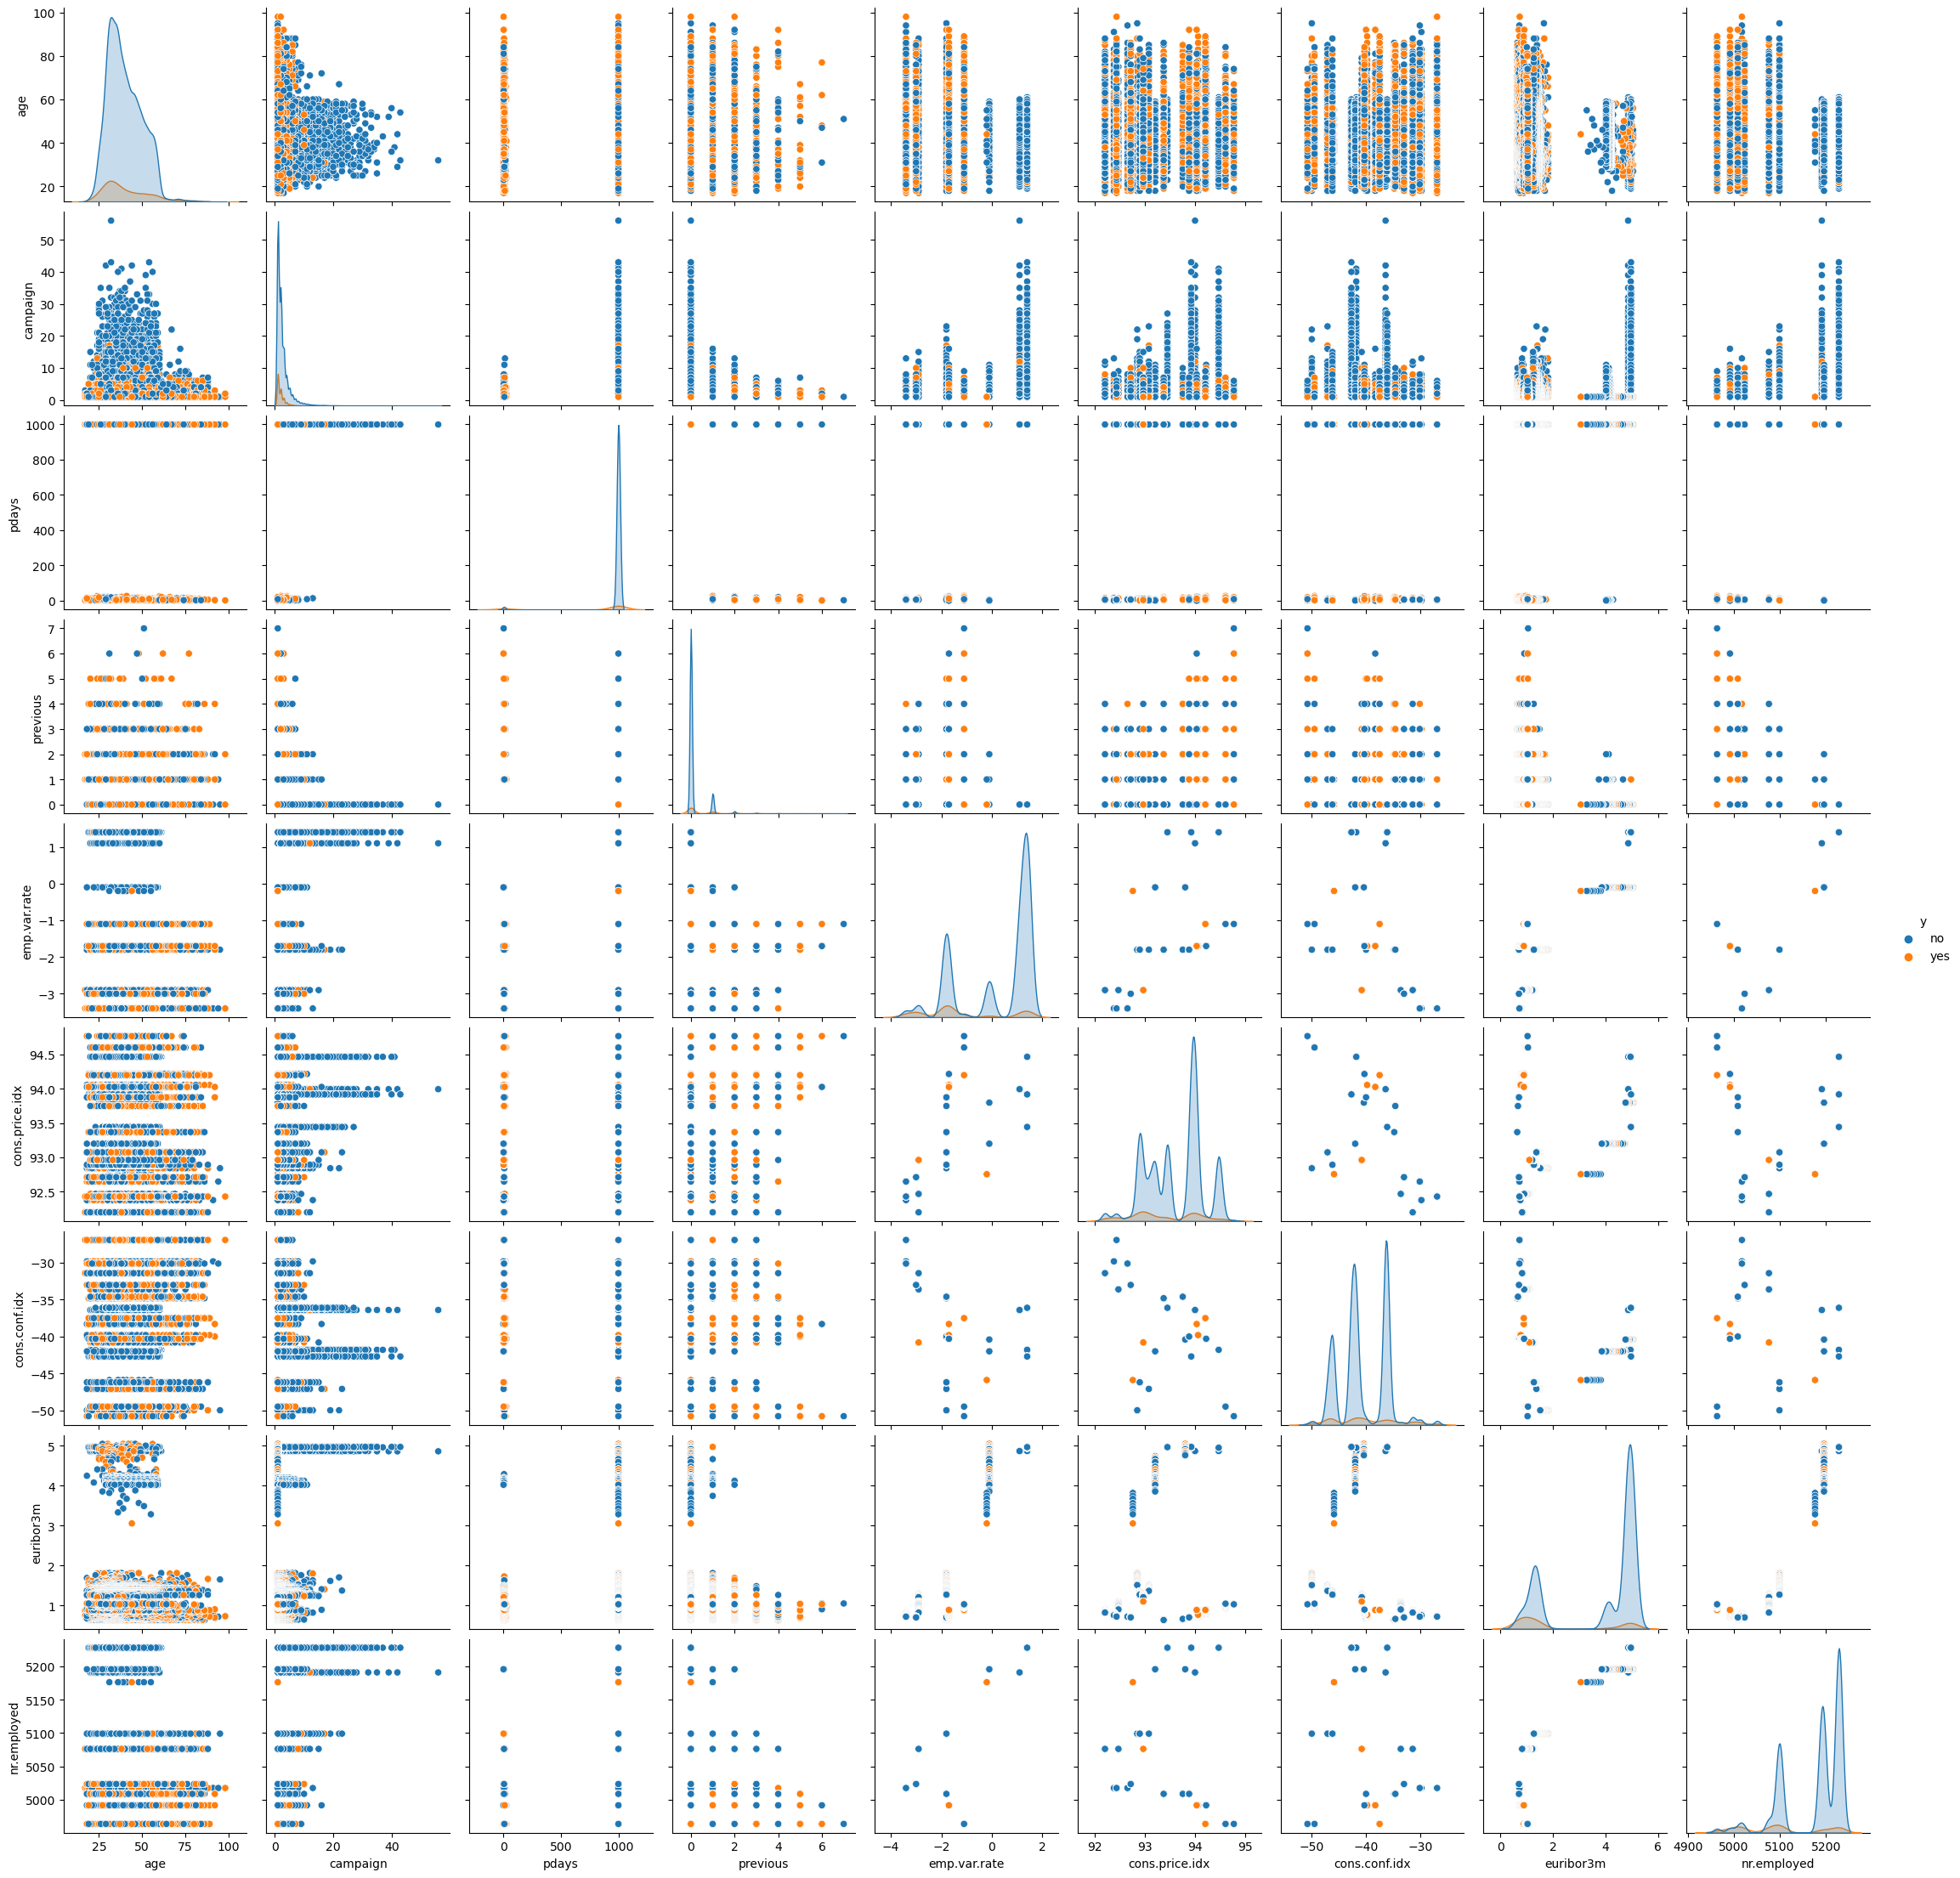

In [67]:
sns.pairplot(df.drop('duration', axis=1), hue='y')

There doesn't appear to be any obvious feature related behavior from an initial examination, as such we will only remove **"duration"** at first and examine model behavior before considering to remove any other features.

One other feature that could benefit from adjustment is **"pdays"**. While scaling would account for this to a certain degree, defining "no previous contact" as 999 heavily skews results related to this subset of samples. As such, these values will be changed to -1, which has the added benefit of making overall results related to samples with these values as more interpretable.

In [71]:
no_duration_df = df.drop('duration', axis=1)
no_duration_df.loc[no_duration_df['pdays'] == 999, 'pdays'] = -1
no_duration_df['pdays'].value_counts()

-1     39673
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: pdays, dtype: int64

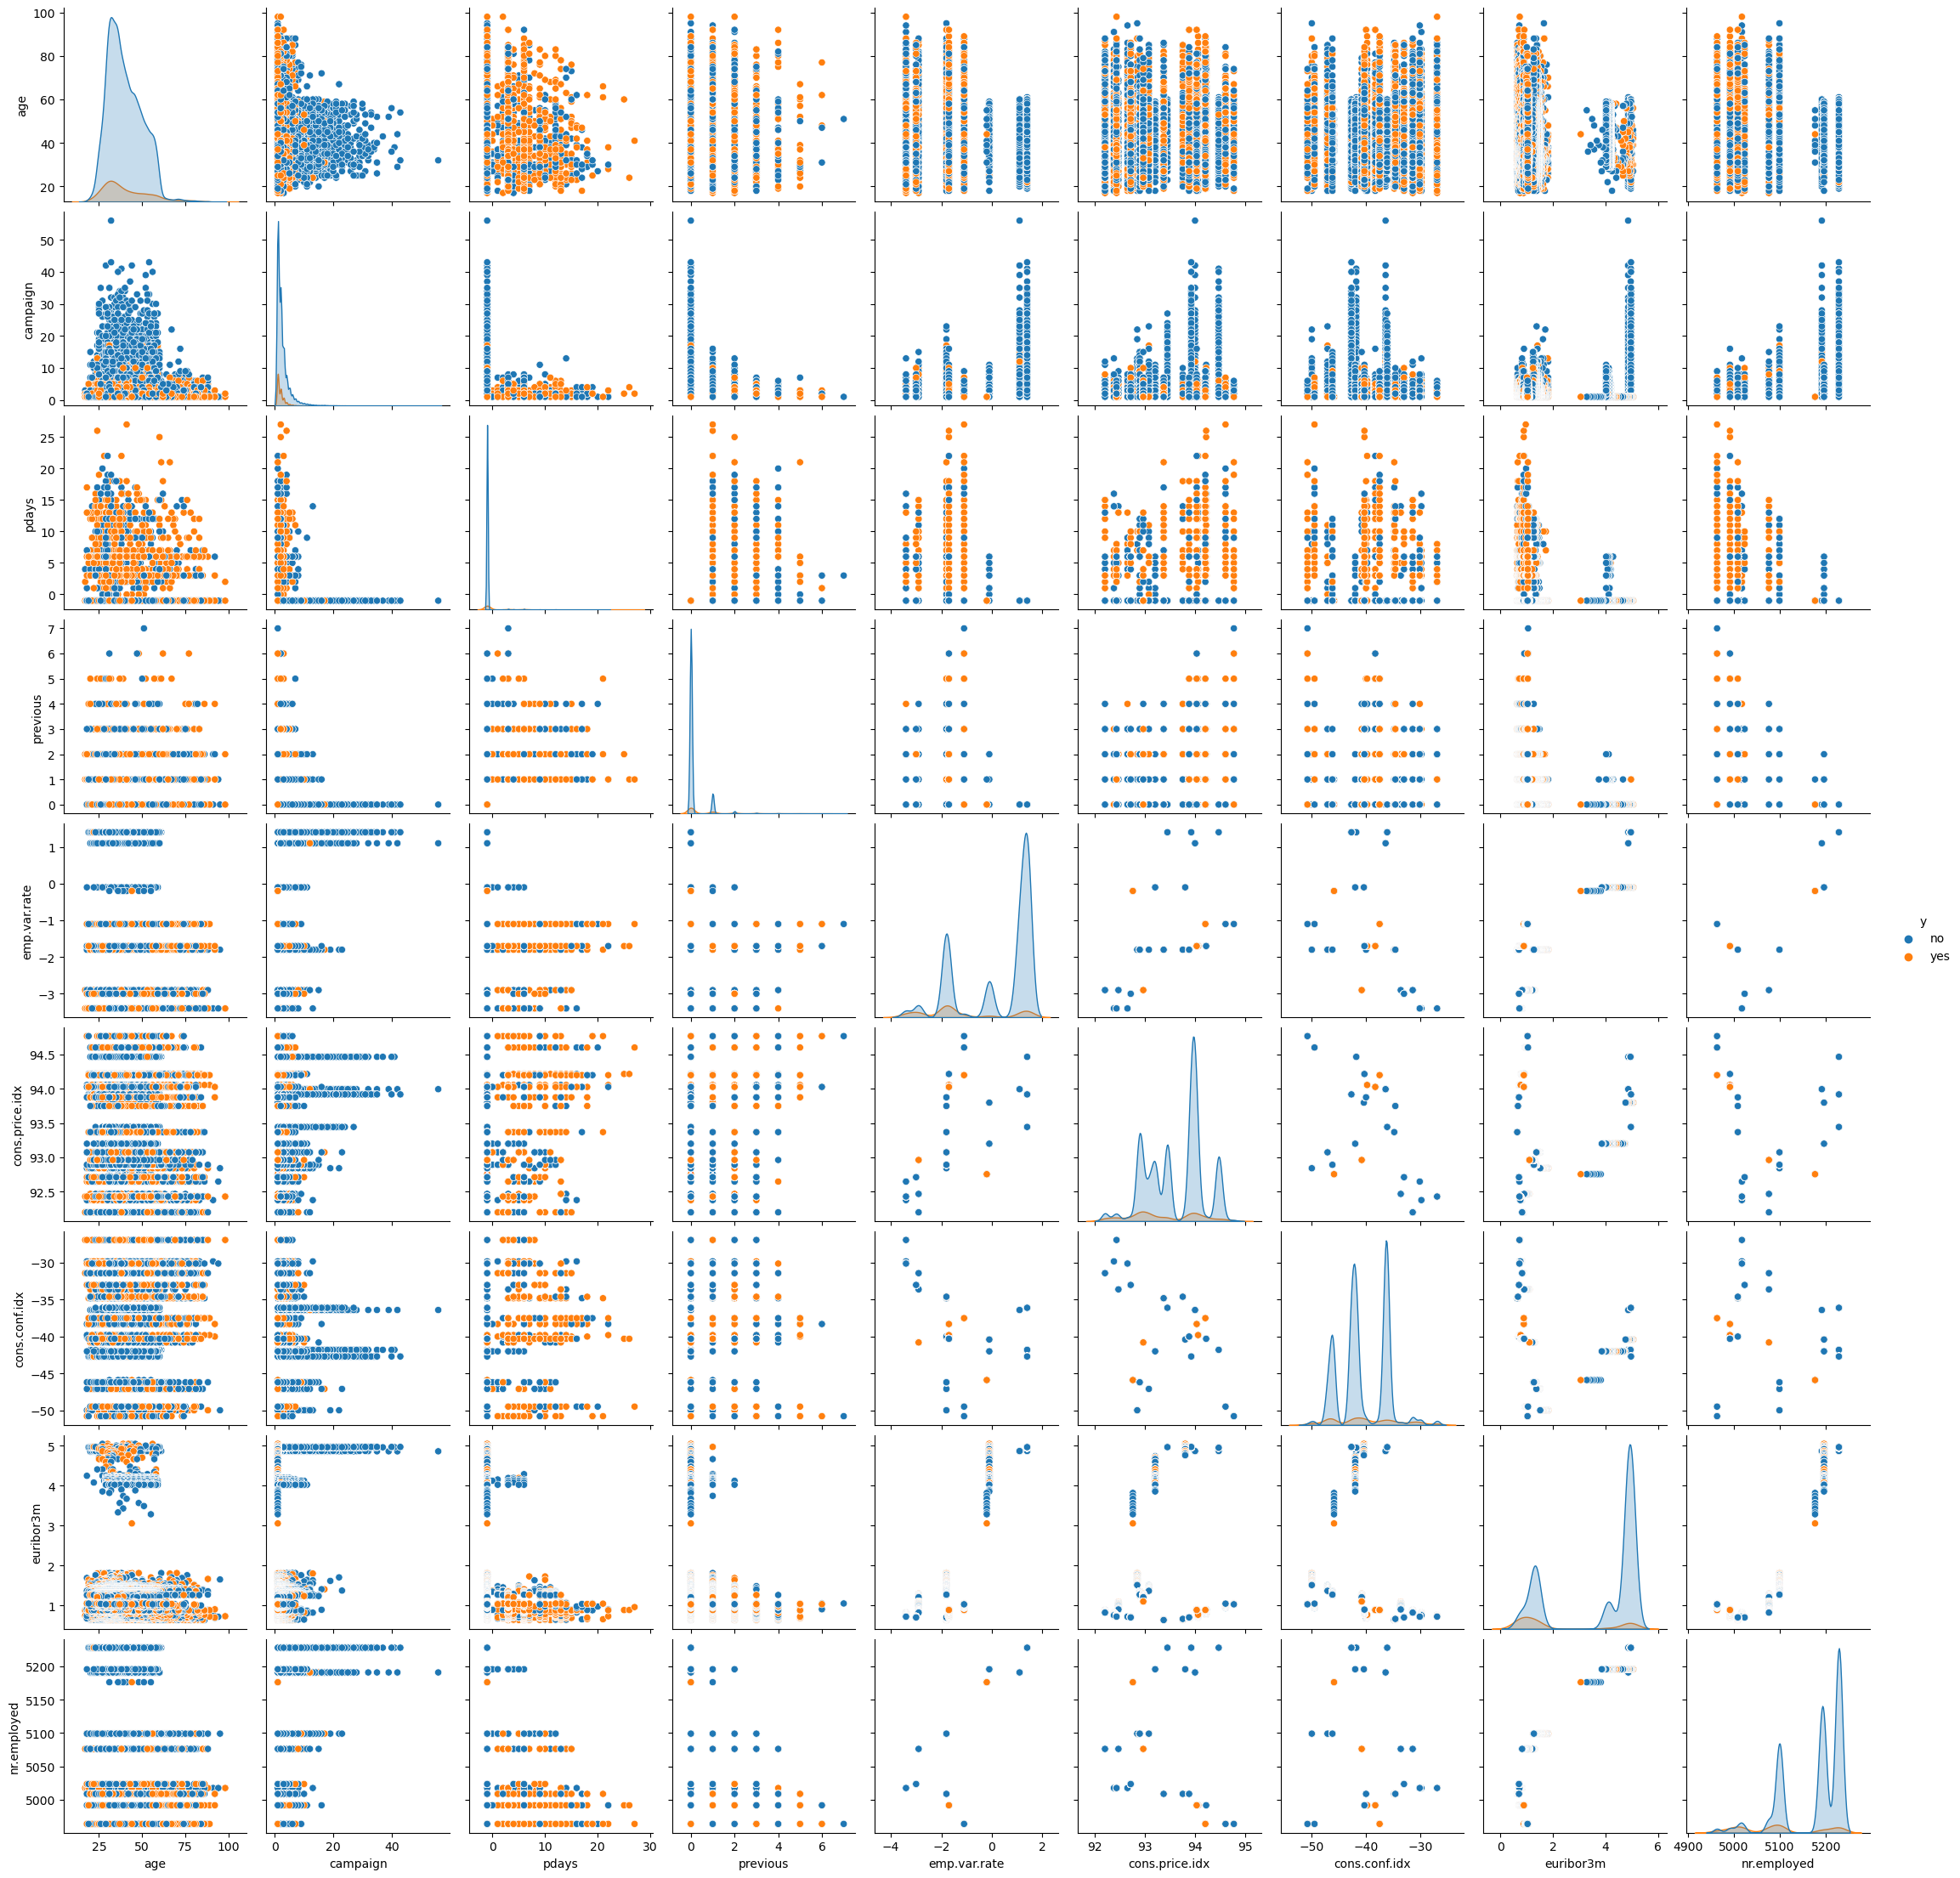

In [73]:
sns.pairplot(no_duration_df, hue='y')

### Methods for Model Performance Comparison

In [78]:
def compare_models(models, X, y):
    train_times = []
    train_accuracy = []
    test_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    for model in models:
        train_times, train_accuracy, test_accuracy = fit_model(
            model, 
            train_times, 
            train_accuracy, 
            test_accuracy, 
            X_train, 
            X_test, 
            y_train, 
            y_test
        )
    
    return display_models(train_times, train_accuracy, test_accuracy)

def fit_model(model, train_times, train_accuracy, test_accuracy, X_train, X_test, y_train, y_test):
    fit_start = time.time()
    model.fit(X_train, y_train)
    fit_end = time.time()

    fit_time = (fit_end - fit_start)
    
    train_times.append(fit_time)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    
    return train_times, train_accuracy, test_accuracy

def display_models(train_times, train_accuracy, test_accuracy):
    model_comparison_df = pd.DataFrame({
        'Model': ['LR', 'KNN', 'DT', 'SVM'],
        'Train Time': train_times,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

    return model_comparison_df.set_index('Model')

### Comparison of Models with Full Features

In [82]:
X_full_features = no_duration_df.drop('y', axis=1)
y_full_features = np.where(no_duration_df['y'] == 'yes', 1, 0)

In [80]:
full_feature_models = [lr_pipeline, knn_pipeline, dt_pipeline, svm_pipeline]

compare_models(full_feature_models, X_full_features, y_full_features)

,Train Time,Train Accuracy,Test Accuracy
Model,,,
LR,0.823320,0.899514,0.900704
KNN,0.124475,0.911836,0.897062
DT,0.410977,0.995417,0.841345
SVM,157.088274,0.905827,0.903253


### Balance Samples
Currently only a small percentage of samples return a positive outcome (subscribed). For certain models this can skew the performance. As such we will perform oversampling in an effort to improve model performance.

In [85]:
from imblearn.over_sampling import SMOTENC

In [88]:
oversample = SMOTENC(categorical_features='auto', random_state=42)

X_balanced, y_balanced = oversample.fit_resample(X_full_features, y_full_features)

(73096, 19)

In [ ]:
balanced_feature_models = [lr_pipeline, knn_pipeline, dt_pipeline, svm_pipeline]

compare_models(balanced_feature_models, X_balanced, y_balanced)

##### Questions